In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web
from talib import abstract

# 讀取從指定日期之後的股價資訊
df = web.DataReader("3008.tw", "yahoo", datetime(2018,9,1))
df.columns = ['high', 'low', 'open', 'close', 'volume', 'adj close']

### SMA

Text(0.5,1,'SMA')

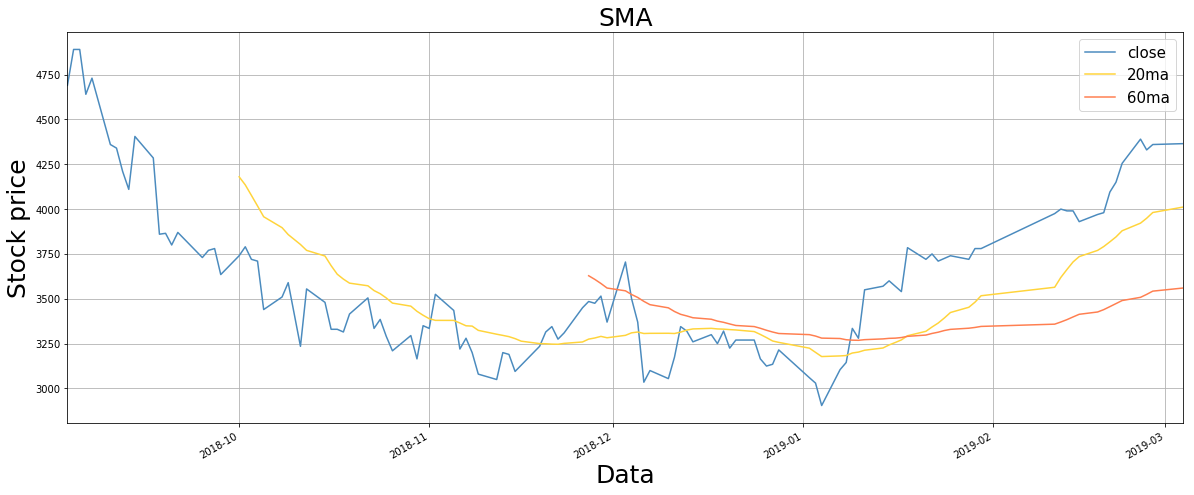

In [2]:
# plt.rcParams["figure.figsize"] = (20,10)
df['close'].plot(color="#4B8BBE", grid=True, figsize=(20, 8))
abstract.SMA(df, 20).plot(color="#FFD43B", label="20ma", grid=True)
abstract.SMA(df, 60).plot(color="coral", label="60ma", grid=True)
plt.legend(prop={'size':15})
plt.xlabel('Data', size=25) 
plt.ylabel('Stock price', size=25) 
plt.title("SMA", size=25)

### RSI

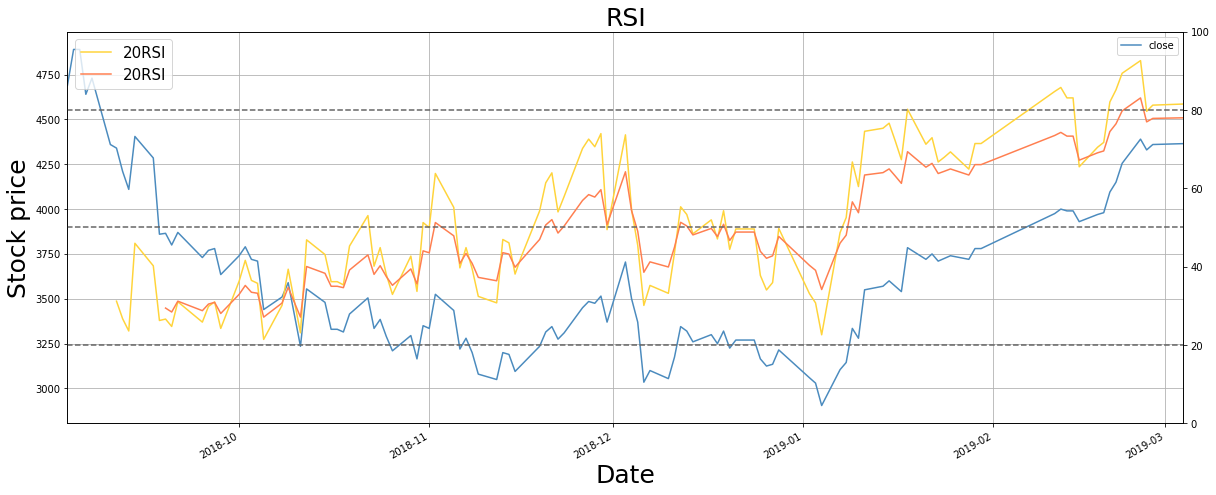

In [3]:
# print(abstract.RSI)
# plt.rcParams["figure.figsize"] = (20,10)
df[['close']].plot(color="#4B8BBE", grid=True, figsize=(20, 8), label="close")
plt.xlabel('Data', size=25) 
plt.ylabel('Stock price', size=25)
plt.title("RSI", size=25)
abstract.RSI(df, timeperiod=6).plot(color="#FFD43B", label="20RSI", secondary_y=True, grid=True)
abstract.RSI(df, timeperiod=12).plot(color="coral", label="20RSI", secondary_y=True, grid=True)
plt.ylim(0, 100)
plt.axhline(y=80, color='#646464', linestyle='--')
plt.axhline(y=50, color='#646464', linestyle='--')
plt.axhline(y=20, color='#646464', linestyle='--')
plt.legend(prop={'size':15})

### BBands

Text(0.5,1,'BBands')

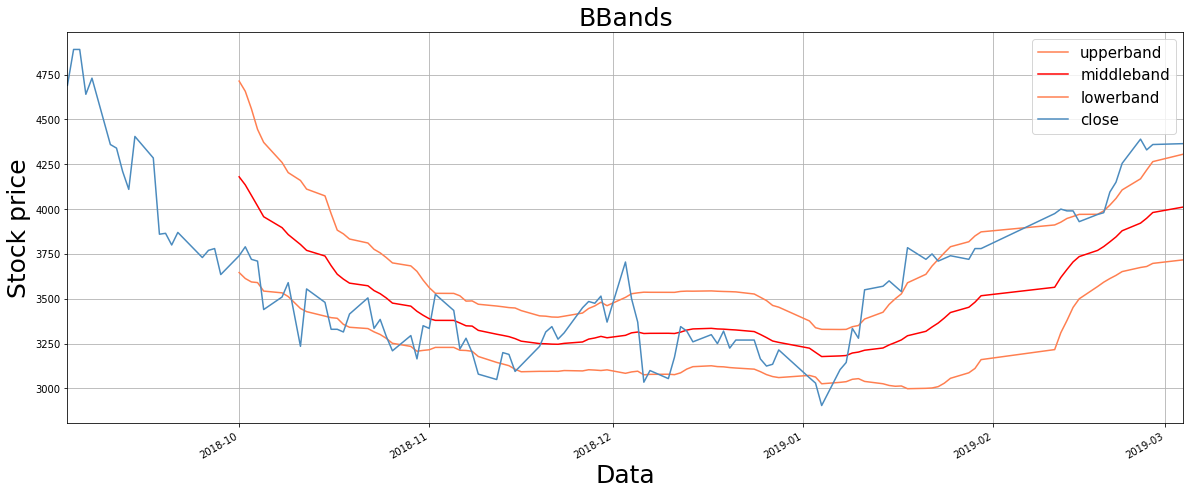

In [4]:
abstract.BBANDS(df, 20, 1.3, 1.3).plot(color=["coral", "red", "coral"], label="20RSI", grid=True, figsize=(20,8))
df['close'].plot(color="#4B8BBE", grid=True, figsize=(20, 8), label="close")
plt.legend(prop={'size':15})
plt.xlabel('Data', size=25) 
plt.ylabel('Stock price', size=25) 
plt.title("BBands", size=25)

Text(0.5,1,'BBands')

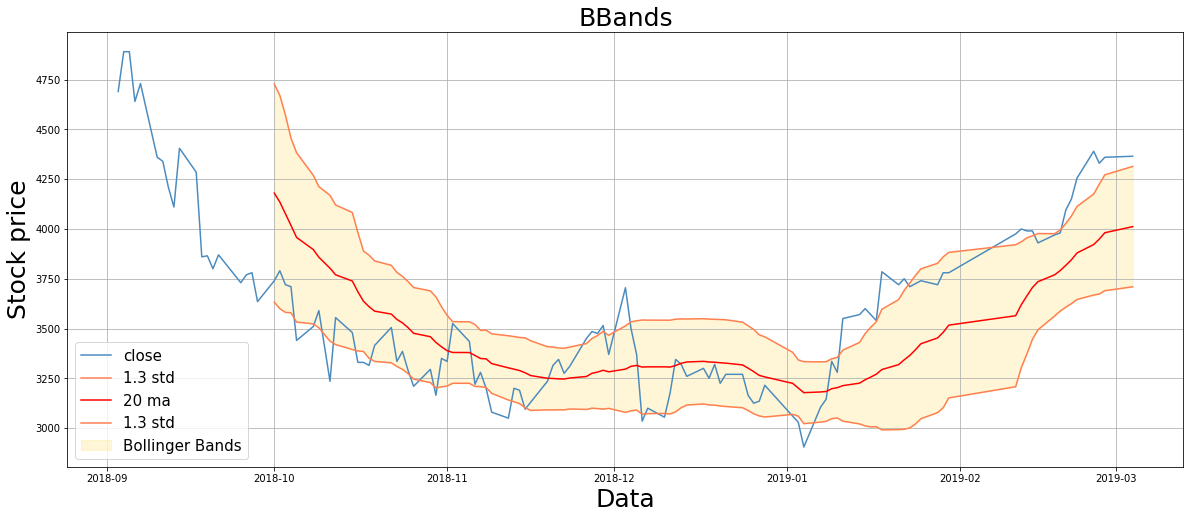

In [5]:
nbdevup=1.3
nbdevdn=1.3
timeperiod=20

# bbands策略,N=20
df['%sma'%timeperiod] = pd.Series.rolling(df['adj close'], window=timeperiod).mean()
df['std'] = pd.Series.rolling(df['adj close'], window=timeperiod).std()
# 上軌=20ma+1.5sd ,中軌=20ma, 下軌=20ma-1.5sd
df['ubb'] = df['%sma'%timeperiod] + nbdevup*df['std']
df['mbb'] = df['%sma'%timeperiod]
df['lbb'] = df['%sma'%timeperiod] - nbdevdn*df['std']
# df[['adj close','ubb','mbb', 'lbb']].plot(grid=True, figsize=(20,10))
fig = plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot(df[['adj close']], color="#4B8BBE", label="close")
plt.plot(df[['ubb']], color="coral", label="%s std"%nbdevup)
plt.plot(df[['mbb']], color="red", label='%s ma'%timeperiod)
plt.plot(df[['lbb']], color="coral", label="%s std"%nbdevdn)
plt.fill_between(df[['mbb']].index, np.squeeze(df[['lbb']]), np.squeeze(df[['ubb']]), alpha=0.2, label='Bollinger Bands', color="#FFD43B")
plt.legend(prop={'size':15})
plt.xlabel('Data', size=25) 
plt.ylabel('Stock price', size=25) 
plt.title("BBands", size=25)